# Sierpinski Triangle Via the Chaos Game

Create a Sierpinski Triangle by repeatedly navigating from the current point to halfway to a randomly selected corner of the triangle

https://en.wikipedia.org/wiki/Chaos_game

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 15)

Populating the interactive namespace from numpy and matplotlib


In [163]:
class fractal(object):
    def __init__(self, vertices, starting_point):
        self.vertices = vertices
        self.starting_point = starting_point
        self.fractal_points = []
        
    def random_vertex(self):
        return rd.choice(self.vertices)

    def midpoint(self, vertex, x, y):
        vertex_x, vertex_y = vertex
        return ( (vertex_x+x)/2.0, (vertex_y+y)/2.0 )
        
    def build_fractal(self, iterations):
        '''The next vertex can be any random vertex'''
        for i in range(0, iterations):
            
            if i==0:
                start_x, start_y = self.starting_point
                self.fractal_points.append(self.midpoint(self.random_vertex(), start_x, start_y))
            else:
                last_x, last_y = self.fractal_points[-1]
                self.fractal_points.append(self.midpoint(self.random_vertex(), last_x, last_y))
               
    def build_fractal_restricted_new_vertex(self, iterations):
        '''The next vertex cannot be the last vertex'''
        for i in range(0, iterations):
            
            if i==0:
                new_vertex = self.random_vertex()
                start_x, start_y = self.starting_point
                self.fractal_points.append(self.midpoint(new_vertex, start_x, start_y))
            else:
                new_vertex = self.random_vertex()
                while(last_vertex == new_vertex):
                    new_vertex = self.random_vertex()
                last_x, last_y = self.fractal_points[-1]
                self.fractal_points.append(self.midpoint(new_vertex, last_x, last_y))
                
            last_vertex = new_vertex
    
    def build_fractal_restricted_clockwise_vertex(self, iterations):
        '''The current vertex cannot be one place away clockwise from the last vertex'''
        for i in range(0, iterations):
            
            if i==0:
                new_vertex = self.random_vertex()
                start_x, start_y = self.starting_point
                self.fractal_points.append(self.midpoint(new_vertex, start_x, start_y))
            else:
                new_vertex = self.random_vertex()
                last_index = self.vertices.index(last_vertex)
                while((last_index+1)%len(self.vertices) == self.vertices.index(new_vertex)):
                    new_vertex = self.random_vertex()
                last_x, last_y = self.fractal_points[-1]
                self.fractal_points.append(self.midpoint(new_vertex, last_x, last_y))
                
            last_vertex = new_vertex
            
    def build_fractal_restricted_next_to(self, iterations):
        '''The current vertex must be next to the last vertex'''
        for i in range(0, iterations):
            
            if i==0:
                new_vertex = self.random_vertex()
                start_x, start_y = self.starting_point
                self.fractal_points.append(self.midpoint(new_vertex, start_x, start_y))
            else:
                new_vertex = self.random_vertex()
                last_index = self.vertices.index(last_vertex)
                while(last_index == self.vertices.index(new_vertex) or (last_index+2)%len(self.vertices) == self.vertices.index(new_vertex)):
                    new_vertex = self.random_vertex()
                last_x, last_y = self.fractal_points[-1]
                self.fractal_points.append(self.midpoint(new_vertex, last_x, last_y))
                
            last_vertex = new_vertex       
            
            
        
    def plot_vertices(self):
        x = [point[0] for point in self.vertices]
        y = [point[1] for point in self.vertices]
        plt.scatter(x,y, s= 100, marker='s')
        plt.show()
        
    def plot_fractal(self):
        x = [point[0] for point in self.vertices]
        y = [point[1] for point in self.vertices]
        plt.scatter(x,y, s= 100, marker='s')
        
        fractal_points_x = [point[0] for point in self.fractal_points]
        fractal_points_y = [point[1] for point in self.fractal_points]
        plt.scatter(fractal_points_x, fractal_points_y, s=5, marker='.')
        
        plt.show()

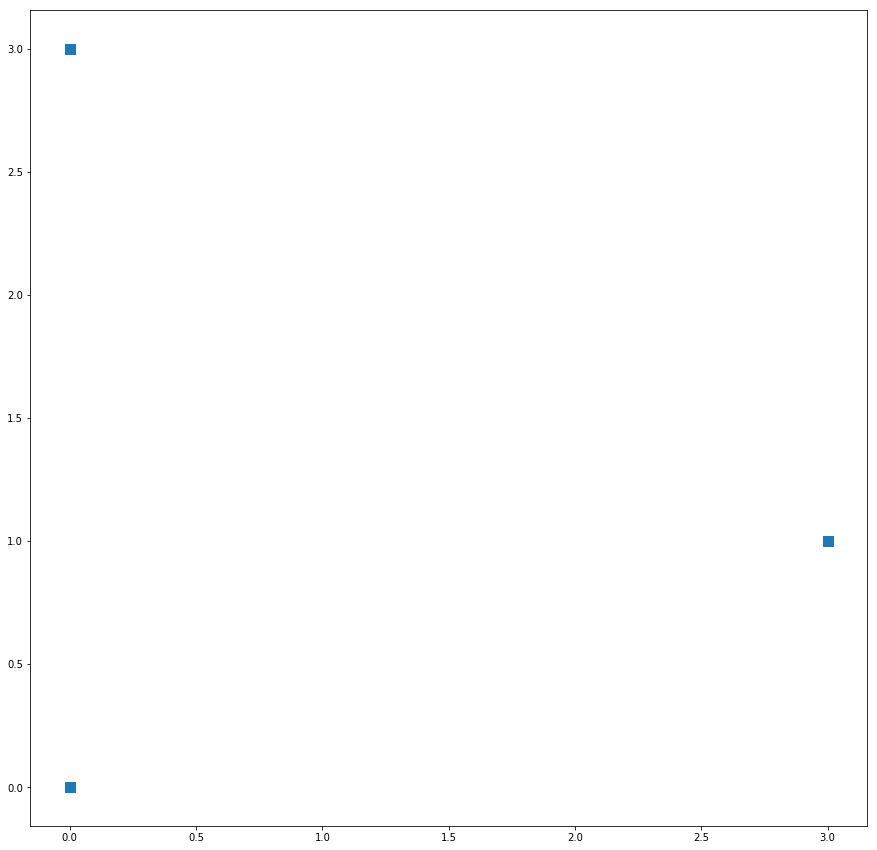

In [157]:
sierpinki_triangle = fractal(vertices=[[0,0], [3,1], [0,3]], starting_point=(1,1))
sierpinki_triangle.plot_vertices()

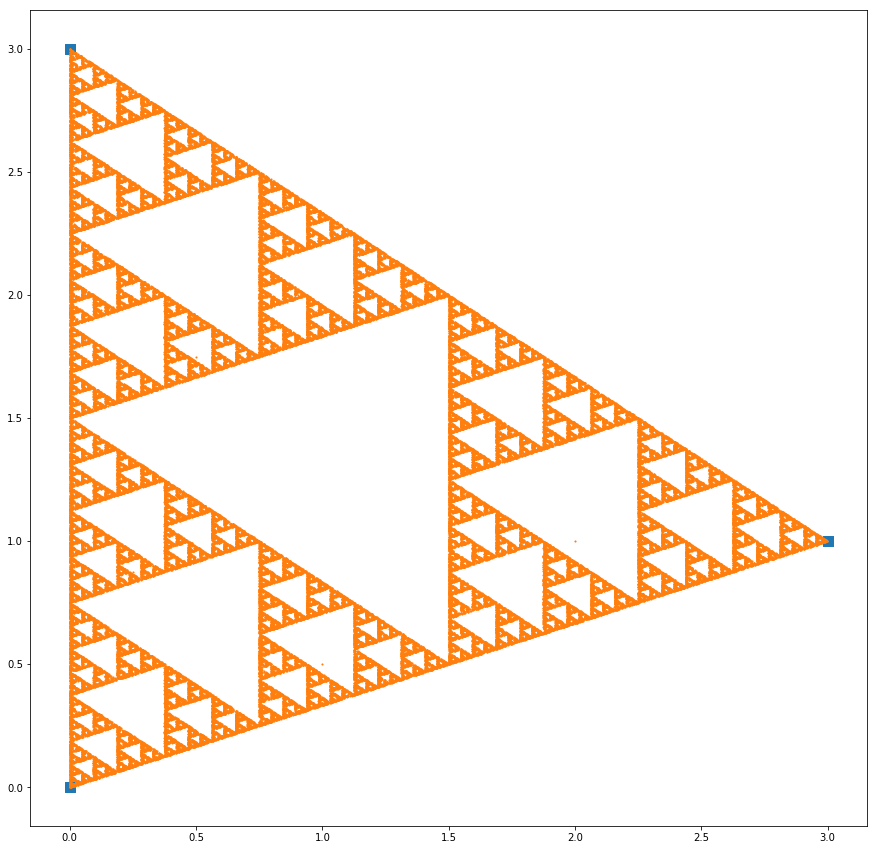

In [158]:
sierpinki_triangle.build_fractal(100000)
sierpinki_triangle.plot_fractal()

# What else can we create?

Lets try creating a fractal from 4 points configured in a square. However without any additional rules the sqaure should fill evenly with seemingly random points.

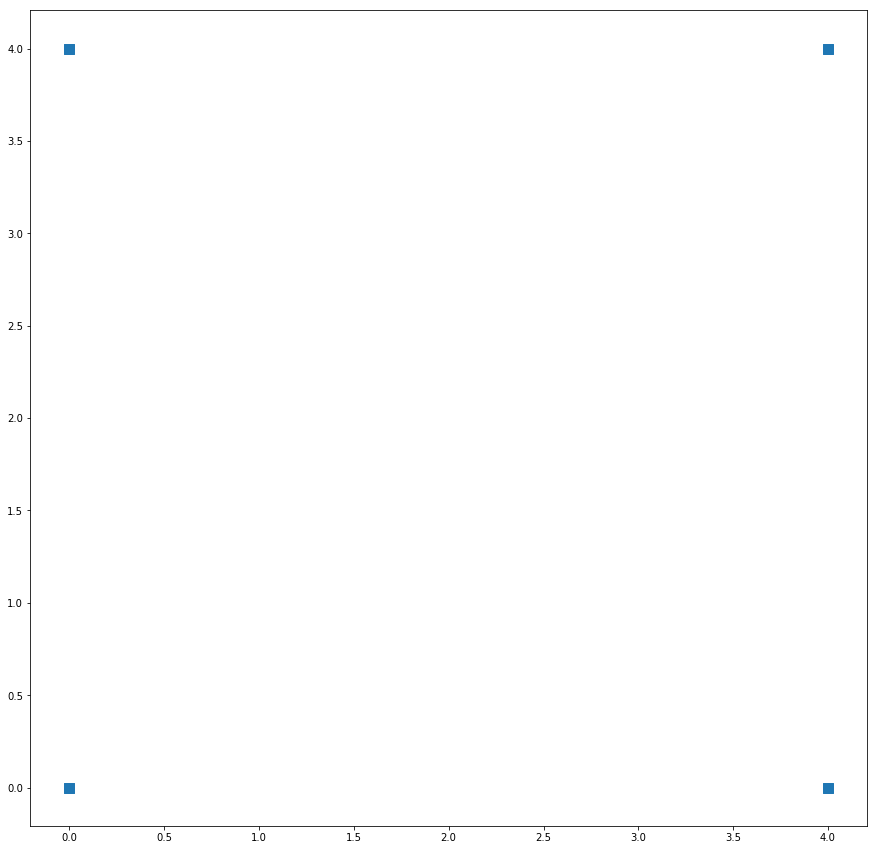

In [159]:
square_fractal = fractal(vertices=[[0,0], [0,4], [4,4], [4,0]], starting_point=(1,1))
square_fractal.plot_vertices()

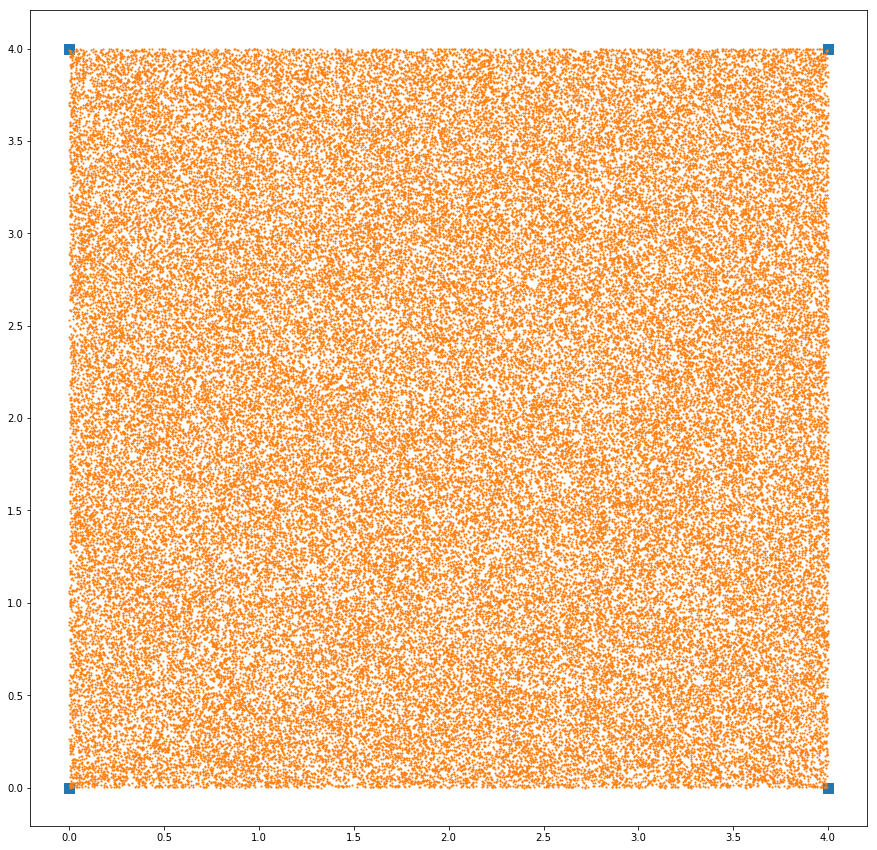

In [160]:
square_fractal.build_fractal(100000)
square_fractal.plot_fractal()

However, after adding in the rule that the same vertice can not be picked twice in a row a fractal should emerge.

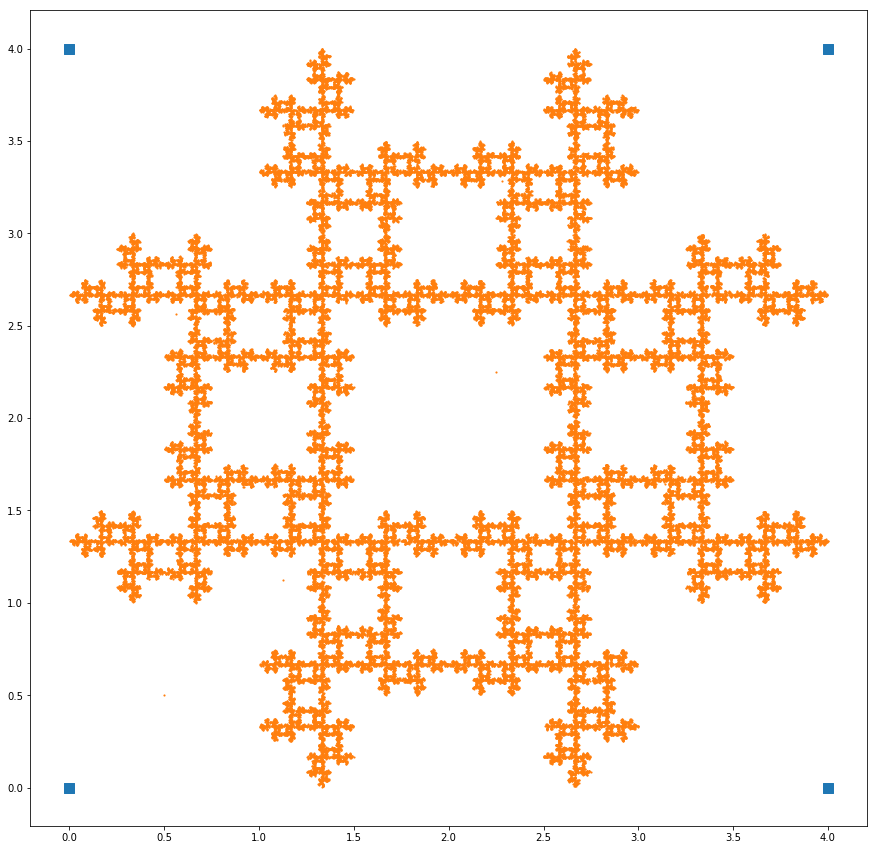

In [161]:
square_fractal_restricted = fractal(vertices=[[0,0], [0,4], [4,4], [4,0]], starting_point=(1,1))
square_fractal_restricted.build_fractal_restricted_new_vertex(100000)
square_fractal_restricted.plot_fractal()

Also, adding the rule that the new vertex cannot be the vertex that is one clockwise from the last vertex produces this.

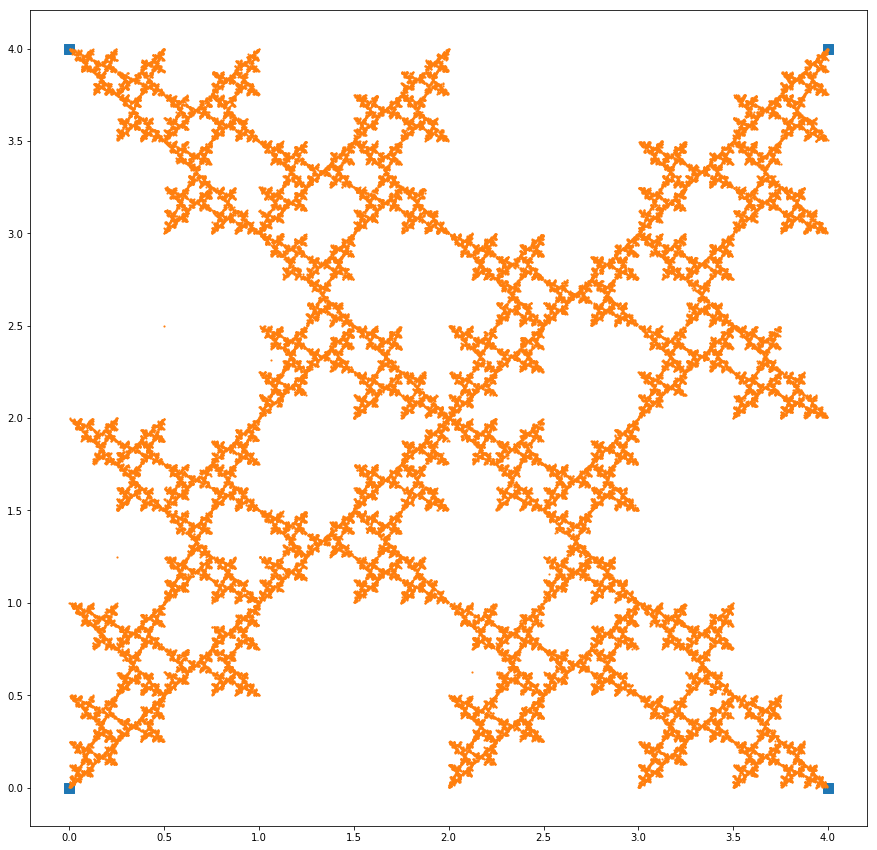

In [164]:
square_fractal_restricted_clockwise = fractal(vertices=[[0,0], [0,4], [4,4], [4,0]], starting_point=(1,1))
square_fractal_restricted_clockwise.build_fractal_restricted_clockwise_vertex(100000)
square_fractal_restricted_clockwise.plot_fractal()

Or adding the rule that the new vertex must be next to the last chosen vertex

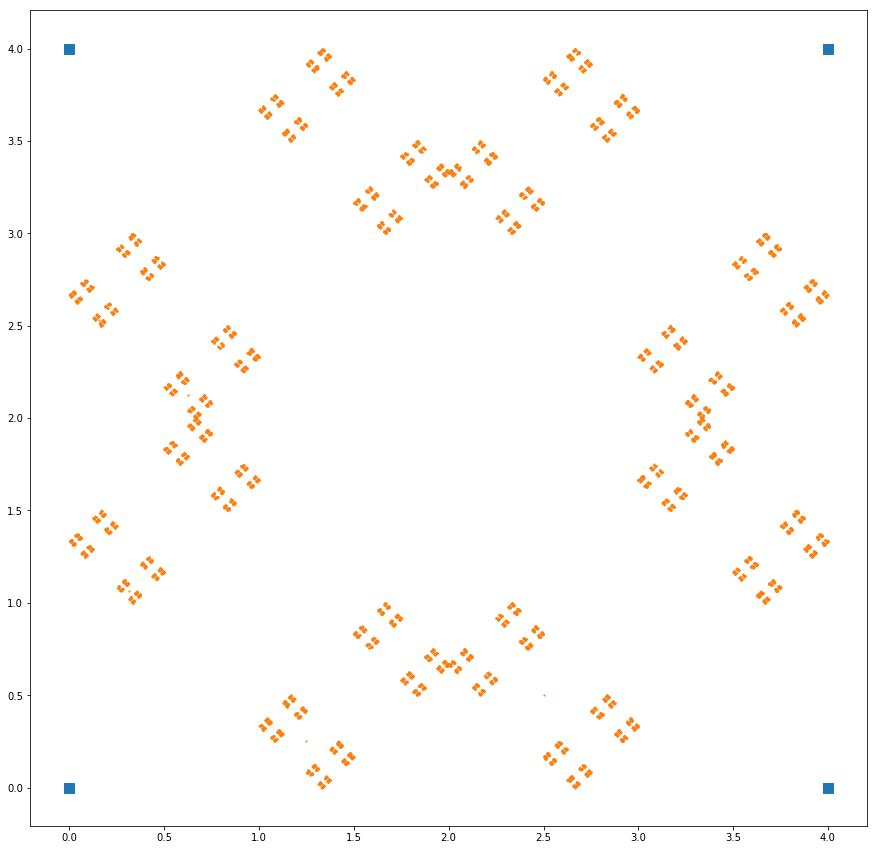

In [167]:
square_fractal_restricted_next_to = fractal(vertices=[[0,0], [0,4], [4,4], [4,0]], starting_point=(1,1))
square_fractal_restricted_next_to.build_fractal_restricted_next_to(10000)
square_fractal_restricted_next_to.plot_fractal()

# Now with a Pentagon

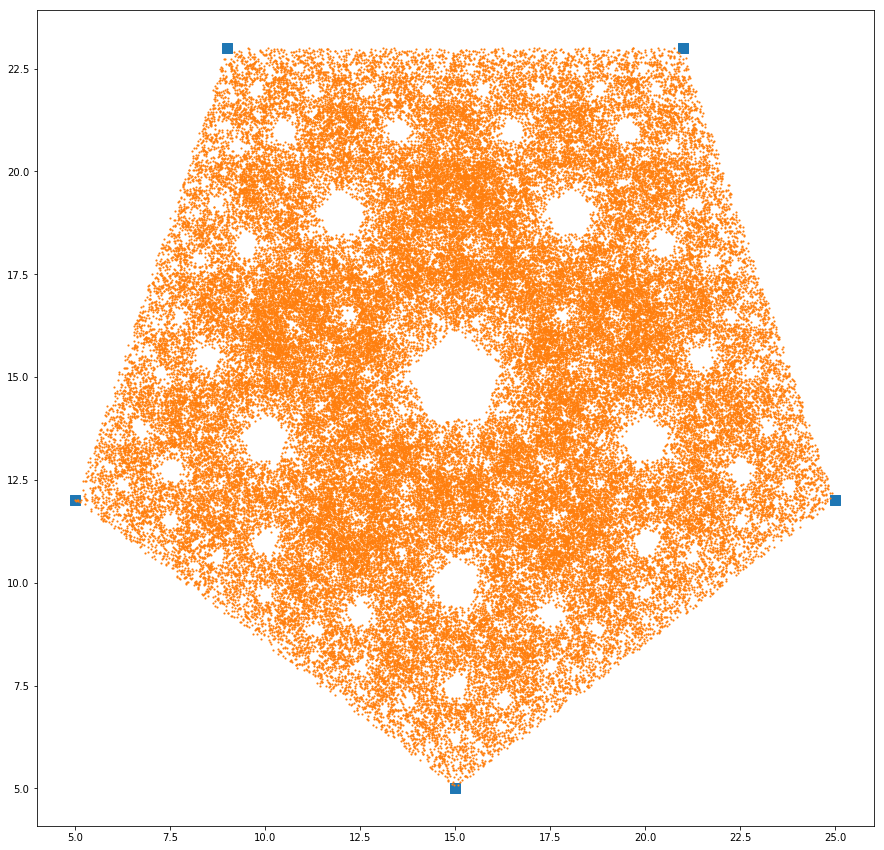

In [176]:
pentagon_fractal = fractal(vertices=[[15,5], [5,12], [9,23], [21,23], [25,12]], starting_point=(1,1))
pentagon_fractal.build_fractal(100000)
pentagon_fractal.plot_fractal()

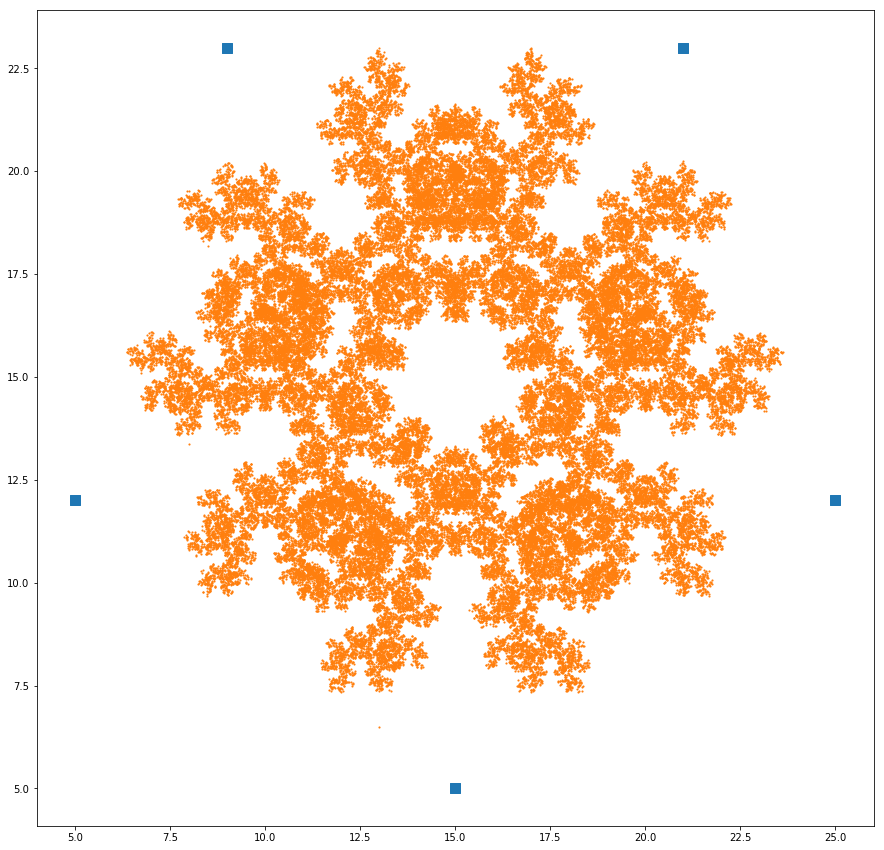

In [177]:
pentagon_fractal = fractal(vertices=[[15,5], [5,12], [9,23], [21,23], [25,12]], starting_point=(1,1))
pentagon_fractal.build_fractal_restricted_new_vertex(100000)
pentagon_fractal.plot_fractal()